<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="Liver.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Indian Liver Patient Prediction </b>
                </font>
            </div>
        </td>
    </tr>
</table> 

## Importing the Necessary Libraries

In [1]:
import pyforest
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from xgboost import XGBClassifier
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import os
from sklearn import tree
import pydotplus
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline


plt.rcParams['figure.figsize'] = [15,12]

## Problem Statement

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from North East of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a patient being Liver Patient or not.

## Data Definition

**Age**: The actual age of the Patient.

**Gender** : Gender of the Patient. (Female, Male)

**Total Bilirubin**: Total bilirubin is a combination of direct and indirect bilirubin. Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18.

**Direct Bilirubin**: In the liver, bilirubin is changed into a form that your body can get rid of. This is called conjugated bilirubin or direct bilirubin.Normal results for direct bilirubin are generally 0.3 mg/dL.

**Alkphos**: Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins.ALP results are reported in units per liter (U/L). For men and women older than age 18, an ALP level between 44 and 147 U/L is considered normal.

**Sgpt**: Alanine aminotransferase (ALT) is an enzyme found mostly in the cells of the liver and kidney.The normal value for ALT in blood ranges from 29 to 33 units per liter (IU/L) for males and 19 to 25 IU/L for females, but this value can vary depending on the hospital.

**Sgpot**: Aspartate aminotransferase (AST) is an enzyme found in cells throughout the body but mostly in the heart and liver and, to a lesser extent, in the kidneys and muscles. A normal ALT test result can range from 7 to 55 units per liter (U/L).

**Total Protein**: The total protein test measures the total amount of two classes of proteins found in the fluid portion of your blood. These are albumin and globulin.The normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L.

**Albumin**: Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. The normal range is 3.4 to 5.4 g/dL.

**A/G Ratio**:  The albumin/globulin ratio is the amount of albumin in the serum divided by the globulins.Normal A/G ratio of slightly over 1.

**Selector**: Patient's affected by Liver Disease (1) and Patient's not affected by Liver Disease (0). (Target Variable)

## EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
df = pd.read_csv('ILPD.csv')
df.head()

<IPython.core.display.Javascript object>

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape #Features

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total Bilirubin   583 non-null    float64
 3   Direct Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   Sgpt              583 non-null    int64  
 6   Sgpot             583 non-null    int64  
 7   Total Protein     583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G Ratio         579 non-null    float64
 10  Selector          583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.isnull().sum()  #Checking for Null Values

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           4
Selector            0
dtype: int64

<IPython.core.display.Javascript object>

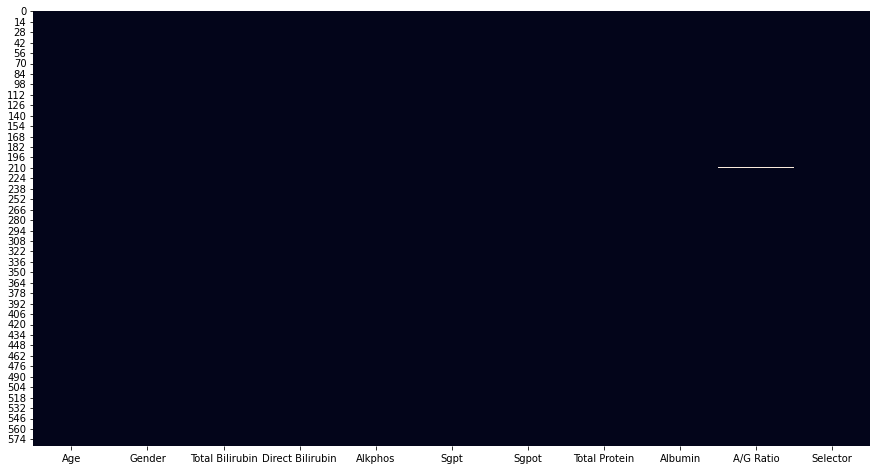

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [8]:
df['A/G Ratio'].fillna(df['A/G Ratio'].median(),inplace=True)
df.isnull().sum()   #Fixing of Null Values

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           0
Selector            0
dtype: int64

<IPython.core.display.Javascript object>

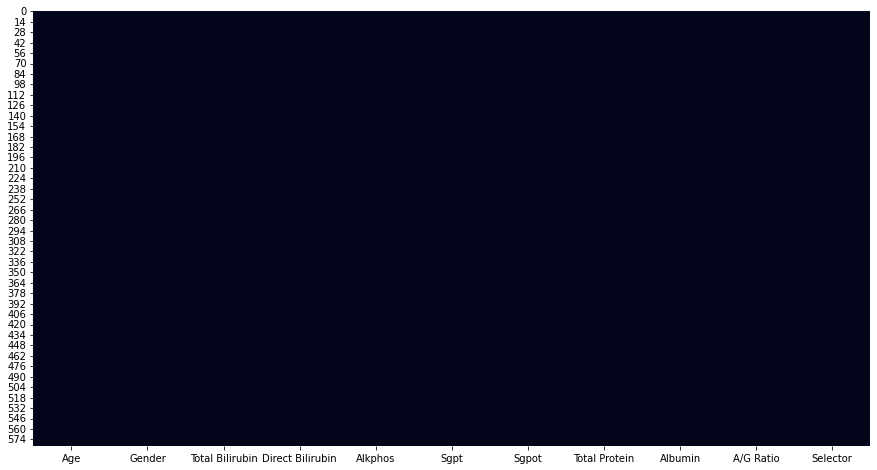

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Feature Engineering

In [10]:
df['Selector'] = df['Selector'].map(lambda x:0 if x==2 else 1)
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [11]:
df['Gender'] = df['Gender'].map(lambda x:0 if x=='Female' else 1)
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [ ]:
df.isnull().sum()

## Outlier Detection

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

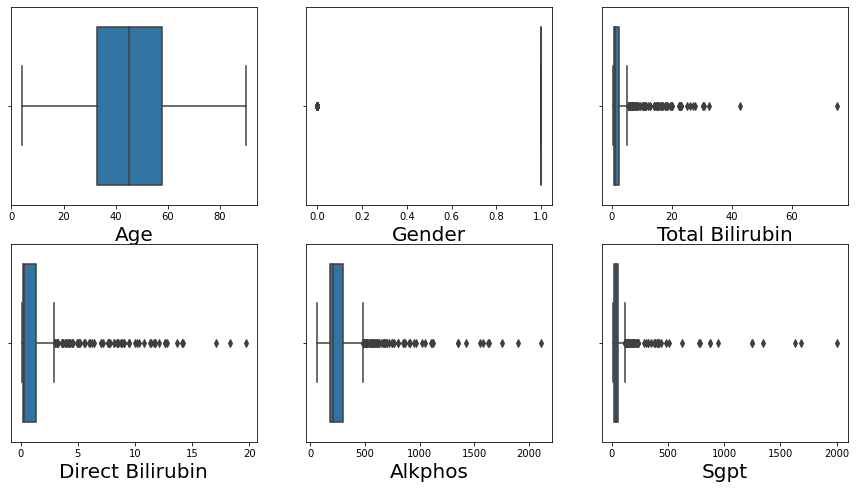

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for variable, subplot in zip(df.columns, ax.flatten()):
    z = sns.boxplot(x = df[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [13]:
df.head(2)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1


### Visual Analysis of the Numerical Columns

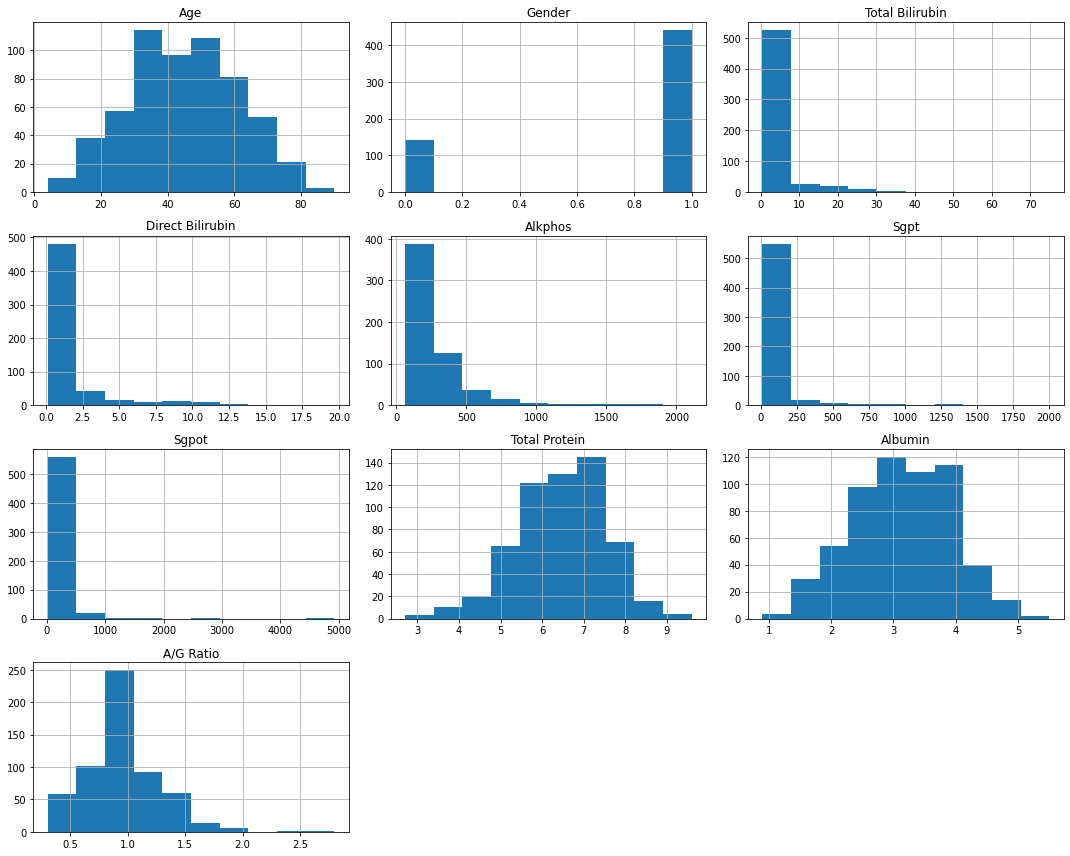

In [14]:
df.drop('Selector',axis=1).hist()
plt.tight_layout()
plt.show()

In [15]:
df.drop('Selector',axis=1).skew()

Age                 -0.029385
Gender              -1.197919
Total Bilirubin      4.907474
Direct Bilirubin     3.212403
Alkphos              3.765106
Sgpt                 6.549192
Sgpot               10.546177
Total Protein       -0.285672
Albumin             -0.043685
A/G Ratio            0.996780
dtype: float64

**Interpretation:** The Variables Age, Total Bilirubin, Direct Bilirubin, Alkphos, Sgpt, Sgpot and A/G Ratio are positively skewed while Gender, Total Protein, Albumin are negatively skewed.

### Visual Analysis of the Target Variable

<IPython.core.display.Javascript object>

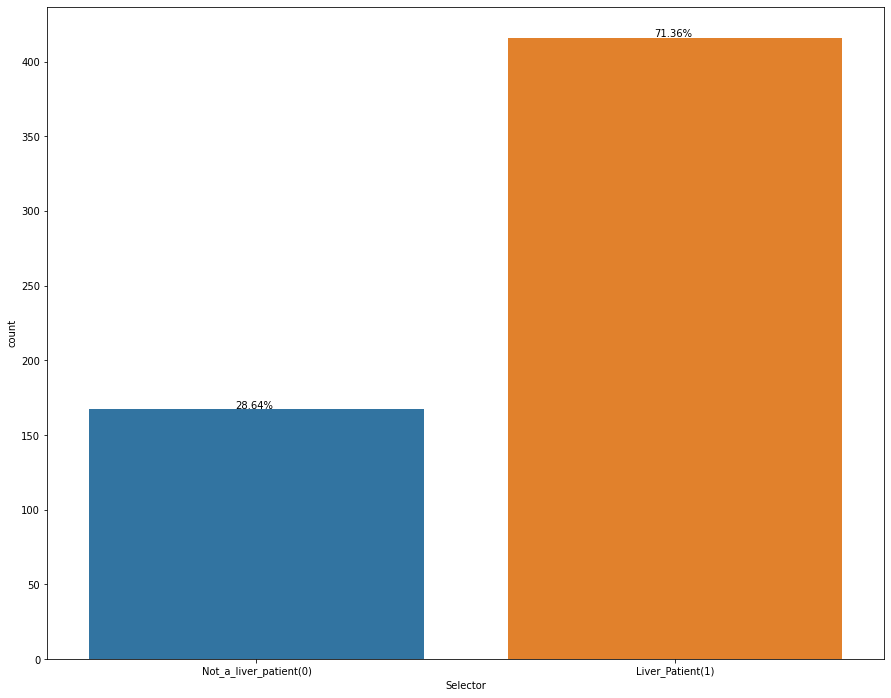

In [16]:
fig = sns.countplot(df['Selector'])
fig.set_xticklabels(['Not_a_liver_patient(0)','Liver_Patient(1)'])
plt.text(x = -0.05, y = df['Selector'].value_counts()[0] + 1, 
         s = str(round((df['Selector'].value_counts()[0])*100/len(df['Selector']),2)) + '%')
plt.text(x = 0.95, y = df['Selector'].value_counts()[1] + 1, 
         s = str(round((df['Selector'].value_counts()[1])*100/len(df['Selector']),2)) + '%')
plt.show()

**Interpretation:** The countplot of the Target Variable indicates no severe Imbalance in the data as 28.64% of the Patients are not having any Liver Disease while 71.36% of the Patients are having Liver Disease.

### Correlation between the Dependent and Independent Variables

<IPython.core.display.Javascript object>

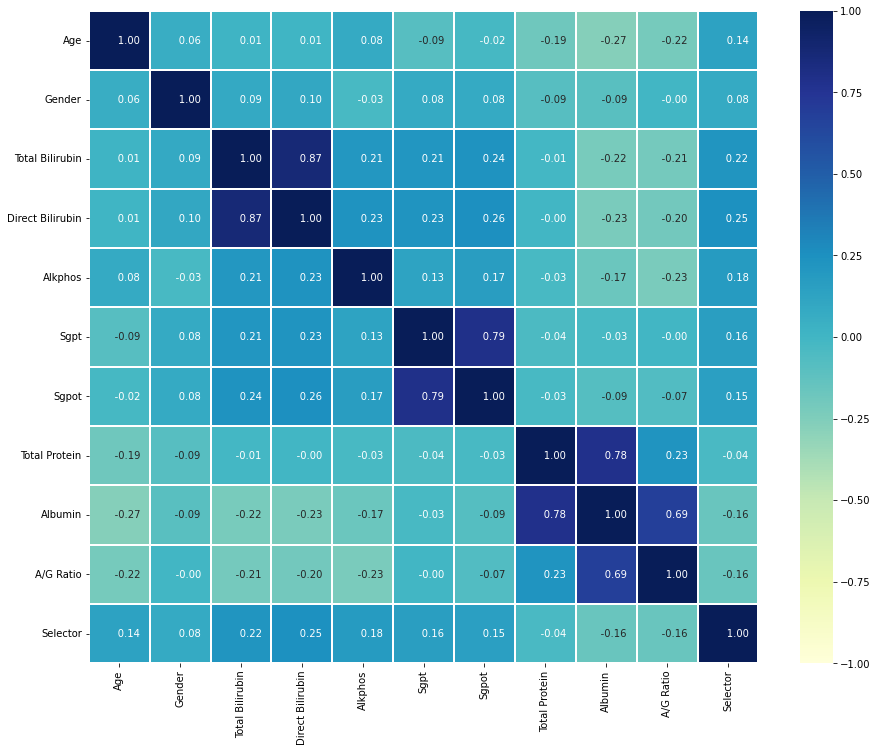

In [17]:
sns.heatmap(df.corr(), 
            annot=True,linewidths = 0.05, vmin = -1 ,
            vmax = 1, cmap = "YlGnBu" , fmt = '10.2f')
plt.show()

In [18]:
df.corr()['Selector'].sort_values(ascending=False)

Selector            1.000000
Direct Bilirubin    0.246046
Total Bilirubin     0.220208
Alkphos             0.184866
Sgpt                0.163416
Sgpot               0.151934
Age                 0.137351
Gender              0.082416
Total Protein      -0.035008
Albumin            -0.161388
A/G Ratio          -0.162144
Name: Selector, dtype: float64

**Interpretation:** There are no great signs of Multi-Collinearity between the Dependent and Independent Variables, overall though it has very less Multi-Collinearity.

#### Separate the variables into Target and Feature variables 

In [19]:
Target = df['Selector']
Features = df.drop('Selector', axis=1)

In [20]:
Features.head(2)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.2, random_state=15)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (466, 10)
y_train:  (466,)
X_test:  (117, 10)
y_test:  (117,)


## Model Building

In [22]:
models = list()

models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(AdaBoostClassifier())
models.append(GradientBoostingClassifier())
models.append(XGBClassifier())

for mods in models:
    print('Model Name: ', mods)
    clf = mods
    model = clf.fit(X_train, y_train)
    print('Accuracy score: ', accuracy_score(y_test, model.predict(X_test)))
    print('Confusion Matrix:','\n', confusion_matrix(y_test,model.predict(X_test)))
    print('\n')
          

Model Name:  LogisticRegression()
Accuracy score:  0.7777777777777778
Confusion Matrix: 
 [[ 8 21]
 [ 5 83]]


Model Name:  KNeighborsClassifier()
Accuracy score:  0.7350427350427351
Confusion Matrix: 
 [[12 17]
 [14 74]]


Model Name:  GaussianNB()
Accuracy score:  0.5555555555555556
Confusion Matrix: 
 [[28  1]
 [51 37]]


Model Name:  DecisionTreeClassifier()
Accuracy score:  0.7094017094017094
Confusion Matrix: 
 [[11 18]
 [16 72]]


Model Name:  RandomForestClassifier()
Accuracy score:  0.7435897435897436
Confusion Matrix: 
 [[ 7 22]
 [ 8 80]]


Model Name:  AdaBoostClassifier()
Accuracy score:  0.7692307692307693
Confusion Matrix: 
 [[12 17]
 [10 78]]


Model Name:  GradientBoostingClassifier()
Accuracy score:  0.7435897435897436
Confusion Matrix: 
 [[ 8 21]
 [ 9 79]]


Model Name:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
      

**Interpretation:** 
    - From the above model building, looking at the Accuracy score and confusion matrix, GaussianNB model is showing good result with confusion matrix having TP+TN(28+37 = 65) though there is low accuracy of 0.55%

## Applying SMOTE Technique

SMOTE technique has been applied to improve the performance considering the dataset as imbalanced.

In [23]:
import imblearn

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_sm,  y_sm =  smote.fit_resample(X_train, y_train)
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_sm))

Before SMOTE:  Counter({1: 328, 0: 138})
After SMOTE:  Counter({0: 328, 1: 328})


In [25]:
smote = SMOTE()
X_sm_test,  y_sm_test =  smote.fit_resample(X_test, y_test)
print("Before SMOTE: ", Counter(y_test))
print("After SMOTE: ", Counter(y_sm_test))

Before SMOTE:  Counter({1: 88, 0: 29})
After SMOTE:  Counter({0: 88, 1: 88})


#### Create a generalized function to calculate the metrics for the train and test sets

In [26]:
def get_train_report(model):
    train_pred = model.predict(X_sm)
    return(classification_report(y_sm, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_sm_test)
    return(classification_report(y_sm_test, test_pred))

def plot_confusion_matrix(model):
    y_pred = model.predict(X_sm_test)
    cm = confusion_matrix(y_sm_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True,  cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_sm_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_sm_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Liver Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_sm_test, y_pred_prob),4)))
    plt.grid(True)

## Model Building

In [27]:
models = list()
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(AdaBoostClassifier())
models.append(XGBClassifier())

for mods in models:
    print('Model Name: ', mods)
    clf = mods
    model = clf.fit(X_sm,  y_sm)
    print('Accuracy score: ', accuracy_score(y_sm_test, model.predict(X_sm_test)))
    print('Confusion Matrix:','\n', confusion_matrix(y_sm_test,model.predict(X_sm_test)))
    print('\n')
    print("Classification Train report: ")
    train_report = get_train_report(model)
    print(train_report)
    print("Classification Test report: ")
    test_report = get_test_report(model)
    print(test_report)


Model Name:  LogisticRegression()
Accuracy score:  0.7329545454545454
Confusion Matrix: 
 [[73 15]
 [32 56]]


Classification Train report: 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       328
           1       0.80      0.59      0.67       328

    accuracy                           0.72       656
   macro avg       0.73      0.72      0.71       656
weighted avg       0.73      0.72      0.71       656

Classification Test report: 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        88
           1       0.79      0.64      0.70        88

    accuracy                           0.73       176
   macro avg       0.74      0.73      0.73       176
weighted avg       0.74      0.73      0.73       176

Model Name:  KNeighborsClassifier()
Accuracy score:  0.6193181818181818
Confusion Matrix: 
 [[50 38]
 [29 59]]


Classification Train report: 
              precision    recall

**Interpretation:** 
    - From the above model building, looking at the Accuracy score and confusion matrix, GaussianNB model is showing good result with confusion matrix having TP+TN(84+38 = 122) after applying SMOTE technique the performance has been improved. There is no overfitting and underfitting issues as shown in the classification reports of both train and test dataset and both f1-score and recall score are similar.

In [28]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_sm,y_sm)

In [29]:
y_pred = gnb_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.69


In [30]:
print(get_train_report(gnb_model))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75       328
           1       0.91      0.42      0.57       328

    accuracy                           0.69       656
   macro avg       0.76      0.69      0.66       656
weighted avg       0.76      0.69      0.66       656



In [31]:
print(get_test_report(gnb_model))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76        88
           1       0.90      0.43      0.58        88

    accuracy                           0.69       176
   macro avg       0.77      0.69      0.67       176
weighted avg       0.77      0.69      0.67       176



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

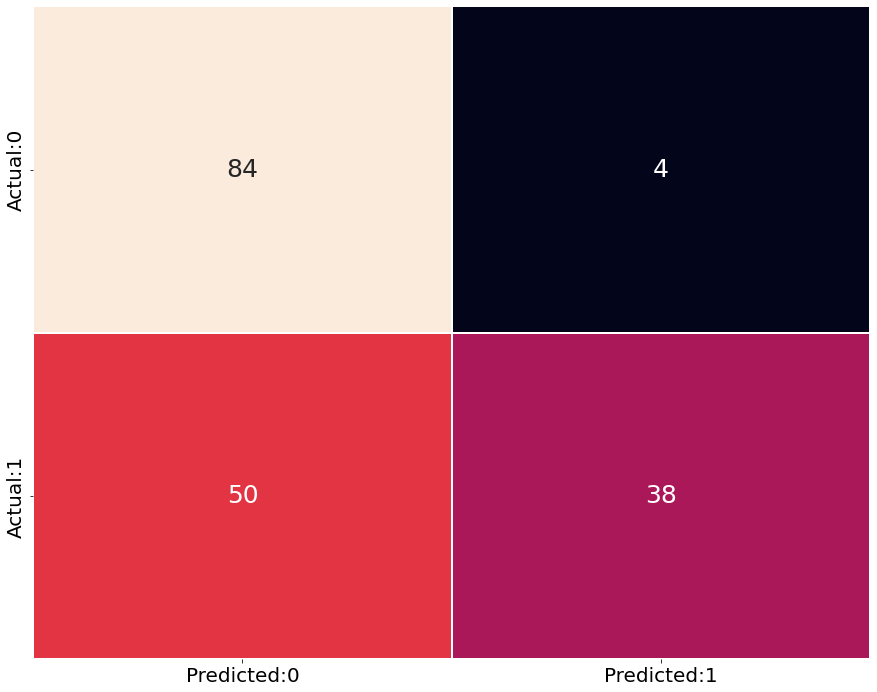

In [32]:
plot_confusion_matrix(gnb_model)

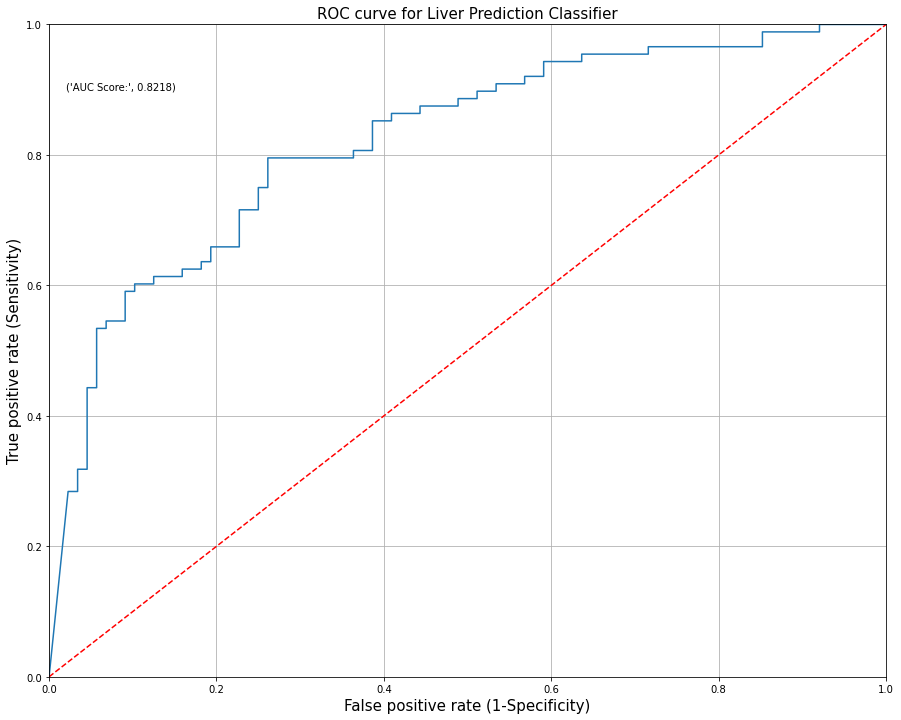

In [33]:
plot_roc(gnb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely GaussianNB classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (GaussianNB with features aftre applying SMOTE) is far from the dotted line; with the AUC score 0.82

## ADA boosting

In [34]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_sm, y_sm)

AdaBoostClassifier()

In [35]:
y_pred = ada_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.69


In [36]:
print(get_train_report(ada_model))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       328
           1       0.88      0.78      0.82       328

    accuracy                           0.83       656
   macro avg       0.84      0.83      0.83       656
weighted avg       0.84      0.83      0.83       656



In [37]:
print(get_test_report(ada_model))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        88
           1       0.68      0.70      0.69        88

    accuracy                           0.69       176
   macro avg       0.69      0.69      0.69       176
weighted avg       0.69      0.69      0.69       176



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

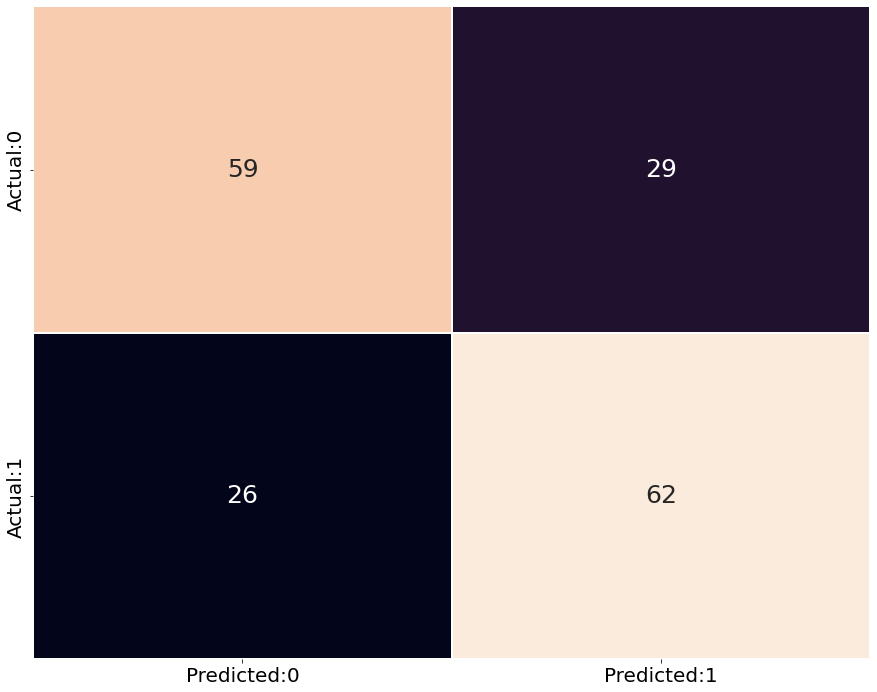

In [38]:
plot_confusion_matrix(ada_model)

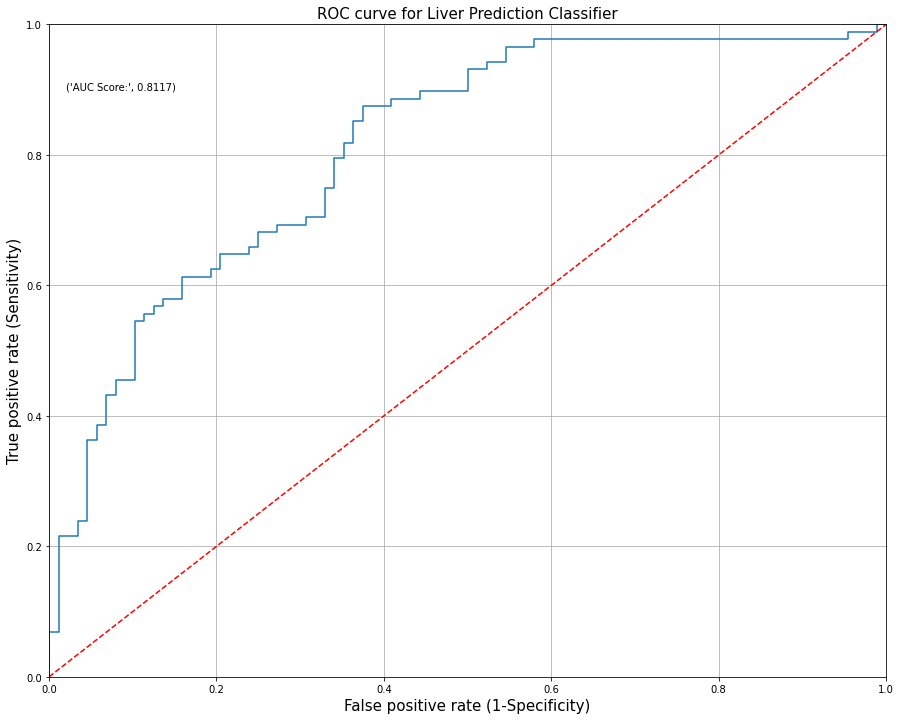

In [39]:
plot_roc(ada_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely ADA boosting classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier is far from the dotted line; with the AUC score 0.81
    
Compare to GaussianNB model, ADA boosting model is not showing great results. Hence parameter tuning is applied further

## Parameter tuning

In [40]:
tuning_parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'n_estimators': range(10,50)}]
                     
ada_x_model = AdaBoostClassifier(random_state=10)

ada_grid = GridSearchCV(estimator = ada_x_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

ada_grid.fit(X_sm, y_sm)

print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost classifier:  {'learning_rate': 0.5, 'n_estimators': 42} 



In [41]:
tuned_ada_model = AdaBoostClassifier(n_estimators = 37,learning_rate=0.4, random_state = 10)
tuned_ada_model.fit(X_sm, y_sm)

AdaBoostClassifier(learning_rate=0.4, n_estimators=37, random_state=10)

In [42]:
y_pred = tuned_ada_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.72


In [43]:
print(get_train_report(tuned_ada_model))

              precision    recall  f1-score   support

           0       0.72      0.88      0.80       328
           1       0.85      0.66      0.74       328

    accuracy                           0.77       656
   macro avg       0.79      0.77      0.77       656
weighted avg       0.79      0.77      0.77       656



In [44]:
print(get_test_report(tuned_ada_model))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        88
           1       0.72      0.70      0.71        88

    accuracy                           0.72       176
   macro avg       0.72      0.72      0.72       176
weighted avg       0.72      0.72      0.72       176



**Interpretation:** We can see there is a little overfitting as train data score(f1-score and recall score) is greater than test data score. Hence there is overfitting.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

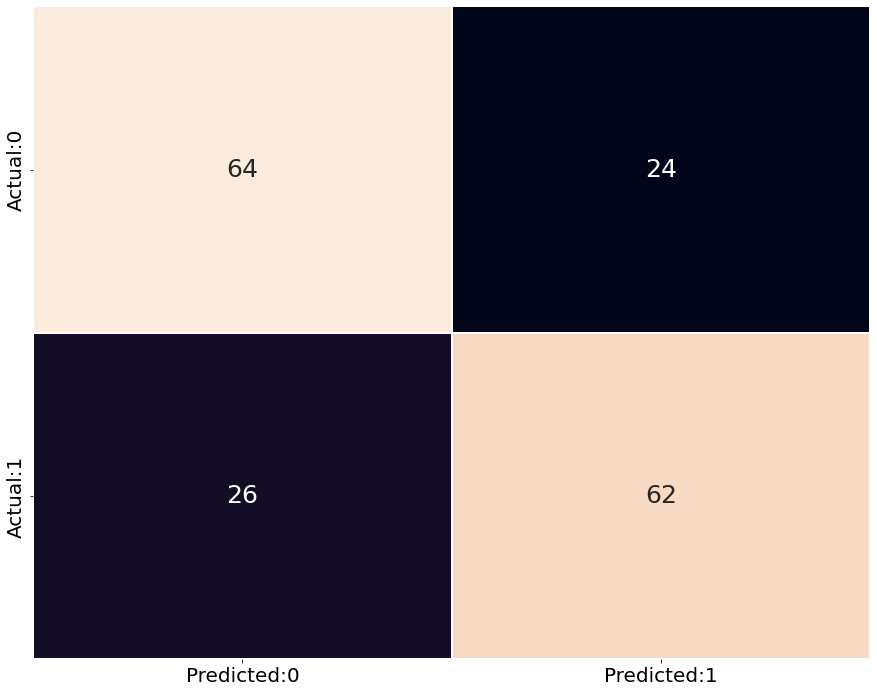

In [45]:
plot_confusion_matrix(tuned_ada_model)

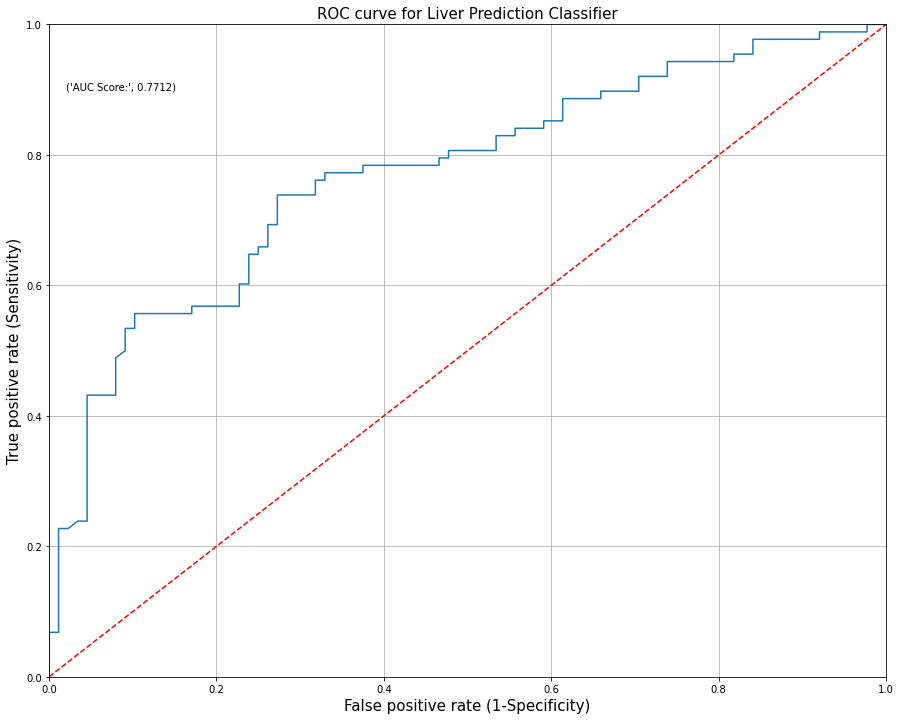

In [46]:
plot_roc(tuned_ada_model)

## Conclusion:

GaussianNB model with SMOTE technique is the better model to predict Patient's liver disease.

In [47]:
import pickle
file = open('gnb_model.pkl','wb')
pickle.dump(gnb_model,file)

In [48]:
import pickle
file = open('tuned_ada_model.pkl','wb')
pickle.dump(tuned_ada_model,file)

In [49]:
Features.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos',
       'Sgpt', 'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio'],
      dtype='object')

## Model Evaluation

### GaussinaNB model

In [50]:
Age = int(input('Enter the Age: '))
Gender = int(input('Enter the Gender (0->Male, 1-Female): '))
Total_Bilirubin = float(input('Enter the Total Bilirubin: '))
Direct_Bilirubin = float(input('Enter the Direct Bilirubin: '))
Alkphos = int(input('Enter the Alkphos: '))
Sgpt = int(input('Enter the Sgpt ( Alanine aminotransferase ): '))
Sgpot = int(input('Enter the Sgpot: '))
Total_Protein = float(input('Enter the Total Protein: '))
Albumin = float(input('Enter the Albumin: '))
AG_Ratio = float(input('Enter the A/G Ratio: '))

to_predict = [[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgpot,Total_Protein,Albumin,AG_Ratio]]
estimated_price = gnb_model.predict(to_predict)
print('Estimated Result: ', str(np.round(estimated_price[0],2)))

Enter the Age: 40
Enter the Gender (0->Male, 1-Female): 1
Enter the Total Bilirubin: 0.9
Enter the Direct Bilirubin: 0.3
Enter the Alkphos: 293
Enter the Sgpt ( Alanine aminotransferase ): 232
Enter the Sgpot: 245
Enter the Total Protein: 6.8
Enter the Albumin: 3.1
Enter the A/G Ratio: 0.8


<IPython.core.display.Javascript object>

Estimated Result:  1


### Tuned ADA model

In [51]:
Age = int(input('Enter the Age: '))
Gender = int(input('Enter the Gender (0->Male, 1-Female): '))
Total_Bilirubin = float(input('Enter the Total Bilirubin: '))
Direct_Bilirubin = float(input('Enter the Direct Bilirubin: '))
Alkphos = int(input('Enter the Alkphos: '))
Sgpt = int(input('Enter the Sgpt ( Alanine aminotransferase ): '))
Sgpot = int(input('Enter the Sgpot: '))
Total_Protein = float(input('Enter the Total Protein: '))
Albumin = float(input('Enter the Albumin: '))
AG_Ratio = float(input('Enter the A/G Ratio: '))

to_predict = [[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgpot,Total_Protein,Albumin,AG_Ratio]]

estimated_price = tuned_ada_model.predict(to_predict)
print('Estimated Result: ', str(np.round(estimated_price[0],2)))

Enter the Age: 40
Enter the Gender (0->Male, 1-Female): 1
Enter the Total Bilirubin: 0.9
Enter the Direct Bilirubin: 0.3
Enter the Alkphos: 293
Enter the Sgpt ( Alanine aminotransferase ): 232
Enter the Sgpot: 245
Enter the Total Protein: 6.8
Enter the Albumin: 3.1
Enter the A/G Ratio: 0.8


<IPython.core.display.Javascript object>

Estimated Result:  1
